In [1]:
import numpy as np
import seaborn as sb
from matplotlib import pylab as plt

sb.set_style('whitegrid')

In [2]:
%matplotlib inline

###Exercise 2.1

In [110]:
# Step 1: set paramenters
alpha = 0.01
lamb = 0.25
b = 0.01
d = 0.005

# Step 2: build the Ahat matrix
A = np.array([ [(1-d)*(1-alpha), (1-d)*lamb],
                [(1-d)*alpha + b, (1-lamb)*(1-d) + b ]])
Ahat = A/(1+b-d) # Matrix transformation to rate version

# Step 3: find the eigenvector corresponding to the unit eigenvalue
eigvals, eigvecs = np.linalg.eig(Ahat)
print "eigenvalues: ",eigvals 
print "eigenvectors: ",eigvecs

eigenvalues:  [ 1.          0.73263682]
eigenvectors:  [[ 0.99679933 -0.70710678]
 [ 0.07994431  0.70710678]]


It is the first column! But it is *normlized* so the length of the vector is 1.

Call $\bar{x} = (z,y)$ our objective, so $z = \bar{e}$, $y = \bar{u}$ and $(a,b)$ our eigenvector column:

$$ a = \frac{z}{norm(\bar{x})} $$
$$ b = \frac{y}{norm(\bar{x})} $$

We could find $z$ and $y$ just with this, knowing that the norm is $\sqrt{(z^2+y^2)}$, but there is a faster way, remembering that $\bar{e}+\bar{u}=1$ so $y = 1-z$.

In less than 2 minutes with pen and paper you can see that $norm(\bar{x}) = \frac{1}{(a+b)}$. The rest is easy:

In [111]:
# Step 3: Find the norm of our objective vector
norm = 1/(eigvecs[0][0]+eigvecs[1][0])

solution = np.array((eigvecs[0][0]*norm,eigvecs[1][0]*norm))
print "Steady-State employment: ",solution[0]
print "Steady-State unemployment: ",solution[1]

Steady-State employment:  0.925753628582
Steady-State unemployment:  0.0742463714179


###Exercise 2.2 and 2.3

In [112]:
# Step 1: set paramenters
alpha = 0.02
lamb = 0.20
b = 0.01
d = 0.005

# Step 2: set vectors and matrices
x_t = np.array([0,1]) # All workers start unemployed
A = np.array([ [(1-d)*(1-alpha), (1-d)*lamb],
                [(1-d)*alpha + b, (1-lamb)*(1-d) + b ]])
Ahat = A/(1+b-d) # Matrix transformation to rate version
x_t1 = Ahat.dot(x_t) # First step

# Step 3: 
eps = 1e-10 # set a "close enough to 0" (remember computer are annoyingly precise)
timer = 1 # set a timer to count the number of iterations we need
u_path = [x_t[1],x_t1[1]] # Generate a list for the path of unemployment, starting from the first values
e_path = [x_t[0],x_t1[0]] # Generate a list for the path of employment

while np.abs(x_t1-x_t).max() > eps:
    timer +=1
    x_t = x_t1
    x_t1 = Ahat.dot(x_t)
    u_path.append(x_t1[1])
    e_path.append(x_t1[0])
    
print "Steady-State employment: ",x_t1[0]
print "Steady-State unemployment: ",x_t1[1]
print "Number of iterations: ",timer

Steady-State employment:  0.869375272721
Steady-State unemployment:  0.130624727279
Number of iterations:  84


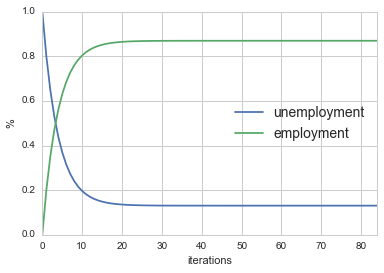

In [113]:
plt.plot(u_path, label="unemployment")
plt.plot(e_path, label="employment")
plt.xlim(0,timer)
plt.ylabel("%")
plt.xlabel("iterations")
plt.legend(loc='best', fontsize=14)
plt.show()

###Cool Exercise 2 part a

In [114]:
# Step 1: set paramenters
alpha_g = 0.01
lamb_g = 0.25
alpha_b = 0.02
lamb_b = 0.20
alpha_vb = 0.03
lamb_vb = 0.15
b = 0.01
d = 0.005
periods = 100

# Step 2: set vectors and matrices

# "Good A" or boom transition matrix
A_g = np.array([ [(1-d)*(1-alpha_g), (1-d)*lamb_g],
                [(1-d)*alpha_g + b, (1-lamb_g)*(1-d) + b ]])
Ahat_g = A_g/(1+b-d)

# "Bad A" or burst transition matrix
A_b = np.array([ [(1-d)*(1-alpha_b), (1-d)*lamb_b],
                [(1-d)*alpha_b + b, (1-lamb_b)*(1-d) + b ]])
Ahat_b = A_b/(1+b-d)

# "Very Bad A" or horrific transition matrix
A_vb = np.array([ [(1-d)*(1-alpha_vb), (1-d)*lamb_vb],
                [(1-d)*alpha_vb + b, (1-lamb_vb)*(1-d) + b ]])
Ahat_vb = A_vb/(1+b-d)

# Step 3: Set initial values
Ahat = Ahat_g
x_t = np.array([0.925753628346,0.0742463716543]) # Solution from before 
x_t1 = Ahat.dot(x_t) # First step

u_path = [x_t[1],x_t1[1]] # Generate a list for the path of unemployment, starting from the first values
e_path = [x_t[0],x_t1[0]] # Generate a list for the path of employment

# Step 4: Simulate
for t in np.arange(1,periods):         # We skip t=0 to allow for this to eb our steady-state
    x_t = x_t1
    if t%10==0 and t%20==0:         # If we are in a period divisible by 20, burst!
        Ahat = Ahat_b
        if t ==60:                  # If we are in period 60, mega-burst!
            Ahat = Ahat_vb
    elif t%10==0 and not t%20==0:   # If we are in a period divisible by 10, boom!
        Ahat = Ahat_g
    x_t1 = Ahat.dot(x_t)     
    u_path.append(x_t1[1])
    e_path.append(x_t1[0])


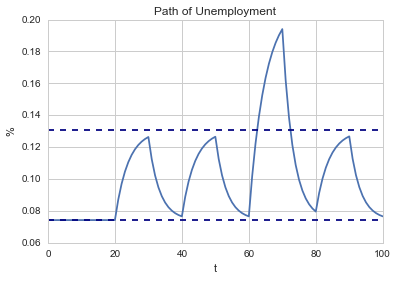

In [115]:
# Plotting cell
plt.plot(u_path, label="unemployment")
plt.xlim(0,periods)
plt.ylabel("%")
plt.axhline(0.130624727279, color='navy', ls='--')
plt.axhline(0.0742463716543, color='navy', ls='--')
plt.title("Path of Unemployment")
plt.xlabel("t")
plt.show()

###Cool Exercise 2 part b

In [116]:
# There are many ways to approach this exercise. One for example is to plan ahead what Ahat is going to be:
rhos = np.arange(0.05,1.05,0.20)
rhos = np.hstack((rhos,1.0))
u_paths = [[]]*len(rhos)
e_paths = [[]]*len(rhos)
l_paths = [[]]*len(rhos)
periods = 100

for i in range(len(rhos)):
    rho = rhos[i]
    l_t = lamb_g
    l_t1 = lamb_g
    l_t2 = lamb_g
    lss = lamb_g
    a_t = alpha_g
    A_t = np.array([ [(1-d)*(1-a_t), (1-d)*l_t],
                    [(1-d)*a_t + b, (1-l_t)*(1-d) + b ]])
    Ahat = A_t /(1+b-d)
    Ahat_path = [Ahat]
    l_paths[i]=[l_t]

    for t in np.arange(1,periods):
        l_t1 = l_t        
        if t%10==0 and t%20==0:         # If we are in a period divisible by 20, burst!
            a_t = alpha_b
            lss = lamb_b
            if t ==60:                  # If we are in period 60, mega-burst!
                a_t = alpha_vb
                lss = lamb_vb
        elif t%10==0 and not t%20==0:   # If we are in a period divisible by 10, boom!
            a_t = alpha_g
            lss = lamb_g
        l_t = (l_t1 + rho*(lss-l_t1))
        l_paths[i].append(l_t)
        A_t = np.array([ [(1-d)*(1-a_t), (1-d)*(l_t)],[(1-d)*a_t + b, (1-l_t)*(1-d) + b ]])
        Ahat = A_t /(1+b-d)
        Ahat_path.append(Ahat)
    
    x_t = np.array([0.925753628346,0.0742463716543]) # Solution from before 
    x_t1 = Ahat_path[0].dot(x_t) # First step

    u_paths[i] = [x_t[1],x_t1[1]] # Generate a list for the path of unemployment, starting from the first values
    e_paths[i] = [x_t[0],x_t1[0]] # Generate a list for the path of employment


    for t in np.arange(1,periods):         # We skip t=0 to allow for this to eb our steady-state
        x_t = x_t1
        x_t1 = Ahat_path[t].dot(x_t)     
        u_paths[i].append(x_t1[1])
        e_paths[i].append(x_t1[0])

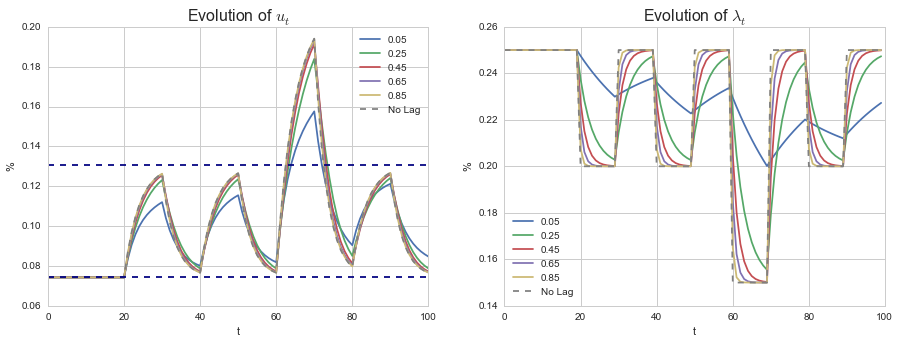

In [123]:
# Plotting cell
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in range(len(u_paths)-1):
    plt.plot(u_paths[i], label=str(rhos[i]))
plt.plot(u_paths[-1], label="No Lag", ls='--', c='grey')
plt.xlim(0,periods)
plt.ylim(0.06,0.2)  # Keep the axis from before
plt.ylabel("%")
plt.xlabel("t")
plt.legend(loc='best')
plt.axhline(0.130624727279, color='navy', ls='--')
plt.axhline(0.0742463716543, color='navy', ls='--')
plt.title("Evolution of $u_t$", fontsize=16)

plt.subplot(122)
for i in range(len(l_paths)-1):
    plt.plot(l_paths[i], label=str(rhos[i]))
plt.plot(l_paths[-1], label="No Lag", ls='--', c='grey')
plt.xlim(0,periods)
#plt.ylim(0.06,0.2)  # Keep the axis from before
plt.ylabel("%")
plt.xlabel("t")
plt.legend(loc='best')
plt.title("Evolution of $\lambda_t$", fontsize=16)

plt.show()

## Part 3 exercises

### 3.1

In [106]:
def U(c, sigma=3.0):
    r'''
    Utility function of the agent        
    Parameters
    -------------        
    c - (array or float) consumption of the agent
    sigma - (float) risk aversion parameter  
    Returns
    ----------        
    U - (array or float) Utility of the agent for each level of consumption
    '''
    negative_c = c < 0.
    if sigma == 1.:
        U =  np.log(c)
    else:
        U= (c**(1-sigma) - 1)/(1-sigma)
    if type(U)==float:
        if U<0:
            U = -9999999
    else:
        U[negative_c] = -9999999.
    return U

U(9.0) # Executing this cell should work fine and now throw any errors!

0.49382716049382713

### 3.2 and 3.3

In [129]:
# Defining some parameters
alpha =0.012
gamma = 0.5
beta = 0.95
sigma = 3.0
wages = np.array([2.0,3.0,5.0])
p = np.array([0.3,0.5,0.2])

def iterateValueFunction(c,w,V): 
    r'''
    Iterates McCall search value function v
    
    Parameters
    ----------
    
    c - (float) Level of unemployment insurance

    w - (len(3) 1d-array) Vector of possible wages       
        
    V - (len(3) 1d-array) continuation value function if offered w[s] next period
        
    Returns
    --------

    V_new - (len(3) 1d-array) current value function if offered w[s] this period 

    Choice - (len(3) 1d-array) do we accept or reject wage w[s]
    '''
    S = len(p)
    Q = p.dot(V)# value before wage offer
    V_U = (U(c*np.ones(S)) + beta*gamma*Q)/( 1-beta*(1-gamma) )
    #stack value of accepting and rejecting offer on top of each other
    stacked_values = np.vstack([ V_U,
                                U(w) + (1-alpha)*beta*V + alpha*beta*V_U ]) 
                                    
    #find whether it is optimal to accept or reject offer    
    V_new = np.amax(stacked_values, axis = 0) 
    Choice = np.argmax(stacked_values, axis = 0)
    return V_new,Choice
        
def solveMcCallModel(c,w,eps = 1e-6):
    r'''
    Solves the infinite horizon McCall search model
        
    Parameters
    -----------
        
    c - (float) Level of unemployment insurance

    w - (len(3) 1d-array) Vector of possible wages 
        
    eps - (float) convergence criterion for infinite horizon
        
    Returns
    --------
        
    V - (1d-array) Value function that solves the infinite horizon problem
        
    Choice - (1d-array) Optimal policy of workers
    '''
    S = len(p)
    v = np.zeros(S) #intialize with zero
    diff = 1.0  #holds difference v_{t+1}-v_t
    v_path = []
    choice_path = []
    its = 0
    while diff > eps:
        v_new,choice = iterateValueFunction(c,w,v) 
        v_path.append(v_new)
        choice_path.append(choice)
        diff = float(np.amax( np.abs(v_new-v) ))#compute difference between value
        v = v_new #copy v_new into v #add in infinte horizon solution
        its +=1
            
    return v,choice,v_path,choice_path, its

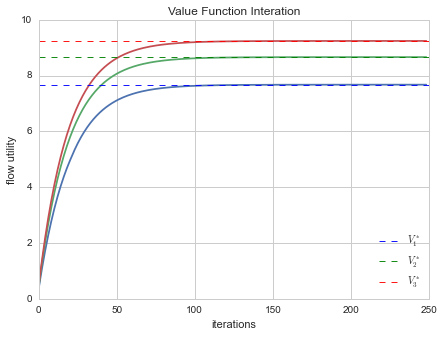

In [130]:
# This cell should work fine and plot something nice!
v_star, c_star, vs, cs, its= solveMcCallModel(1.0,problem_1.wstar)
labels = ["$V_1^*$","$V_2^*$","$V_3^*$"]
colors = ["b","g","r"]

plt.figure(figsize=(7,5))
plt.plot(vs)
for s in range(len(v_star)):
    plt.axhline(v_star[s], ls='--', lw=0.9,color=colors[s], label=labels[s])
plt.legend(loc='best')
plt.xlabel("iterations")
plt.ylabel("flow utility")
plt.title("Value Function Interation")
plt.show()

In [132]:
print "Iterations until convergence: ",its
print "Choice vector: ", c_star, "--> The agent rejects the lowest wage!"

Iterations until convergence:  249
Choice vector:  [0 1 1] --> The agent rejects the lowest wage!


### 3.4 and 3.5

In [ ]:
import LakeModel.py
# Defining wages distribution
w_1 = np.array([2.0,3.0,5.0])
pdf_1 = np.array([0.3,0.5,0.2])
# Creating an instance
model_1 = LakeModel_Equilibrium(0.012,0.5,0.95,3.0, pdf_1, w_1)
# Solving for everything
Tax,Welfare,Flow_Unemp,Flow_Emp,eq_rates = model_1.find_steady_state_tax(1.0)
print "Unemployment rate: ",rates[1]
print "Optimal tax: ",Tax
print "Total welfare: ",Welfare

In [ ]:
# Defining wages distribution
w_2=[1.0,2.0,3.0,10.0]
pdf_2=[0.1,0.45,0.4,0.05]
w_1 = np.array([2.0,3.0,5.0])

# Creating an instance
model_2 = LakeModel_Equilibrium(0.012,0.5,0.95,3.0, pdf_2, w_2)
# Solving for everything
Tax,Welfare,Flow_Unemp,Flow_Emp,eq_rates = model_2.find_steady_state_tax(1.0)
print "Unemployment rate: ",rates[1]
print "Optimal tax: ",Tax
print "Total welfare: ",Welfare